In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [5]:
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


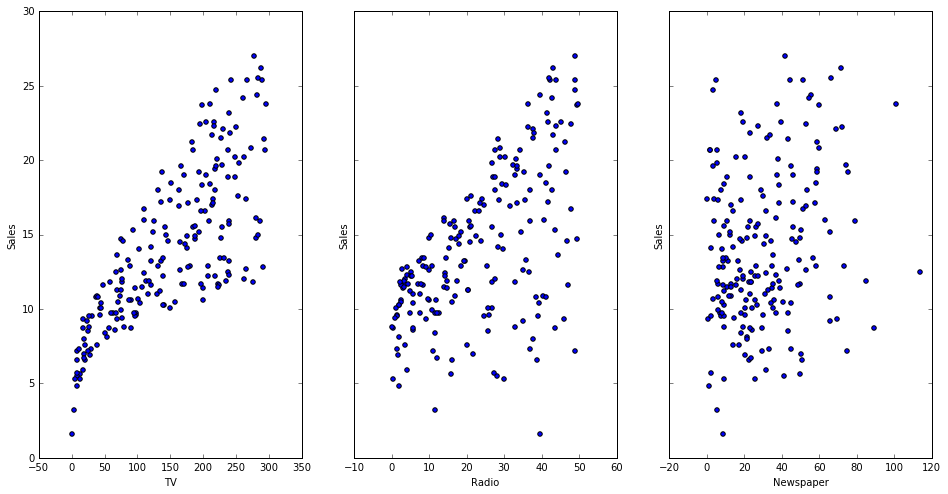

In [6]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1], figsize=(16,8))
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2], figsize=(16,8))


In [8]:
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
lm.intercept_

7.0325935491276947

In [13]:
lm.coef_

array([ 0.04753664])

In [14]:
lm.intercept_ + 50 * lm.coef_

array([ 9.40942557])

In [15]:
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})

In [16]:
X_new.head()

,TV
0,0.7
1,296.4


In [17]:
preds = lm.predict(X_new)

In [18]:
preds

array([  7.0658692 ,  21.12245377])

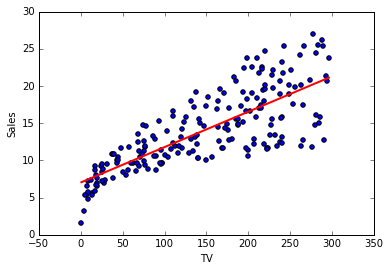

In [20]:
data.plot(kind='scatter', x='TV', y='Sales')

plt.plot(X_new, preds, c='red', linewidth=2)

In [21]:
lm.score(X, y)

0.61187505085007099

In [23]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
6       7.2
7      11.8
8      13.2
9       4.8
10     10.6
11      8.6
12     17.4
13      9.2
14      9.7
15     19.0
16     22.4
17     12.5
18     24.4
19     11.3
20     14.6
21     18.0
22     12.5
23      5.6
24     15.5
25      9.7
26     12.0
27     15.0
28     15.9
29     18.9
30     10.5
       ... 
171     8.4
172    14.5
173     7.6
174    11.7
175    11.5
176    27.0
177    20.2
178    11.7
179    11.8
180    12.6
181    10.5
182    12.2
183     8.7
184    26.2
185    17.6
186    22.6
187    10.3
188    17.3
189    15.9
190     6.7
191    10.8
192     9.9
193     5.9
194    19.6
195    17.3
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, dtype: float64